<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 166.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 136.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 152.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
# 1. 重複行の特定（完全一致する行）
duplicate_count = df.duplicated().sum()
print(f"重複行の数: {duplicate_count}")

# 2. 重複行を削除
df_cleaned = df.drop_duplicates()

# 3. 削除後のデータサイズを確認
original_size = df.shape[0]
new_size = df_cleaned.shape[0]
print(f"元のデータサイズ: {original_size} 行")
print(f"重複削除後のデータサイズ: {new_size} 行")
print(f"削除された重複行数: {original_size - new_size}")


重複行の数: 0
元のデータサイズ: 65437 行
重複削除後のデータサイズ: 65437 行
削除された重複行数: 0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [12]:
# 1. ConvertedCompYearly 列の欠損値の数をカウント
missing_convert_comp_yearly = df['ConvertedCompYearly'].isnull().sum()

# 2. 結果を表示
print(f"ConvertedCompYearly 列の欠損行数: {missing_convert_comp_yearly}")

ConvertedCompYearly 列の欠損行数: 42002


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [13]:
# 1. ConvertedCompYearly 列の欠損値を前の値で補完（forward-fill）
df['ConvertedCompYearly'].fillna(method='ffill', inplace=True)

# 2. 補完後の欠損値の確認
missing_after_imputation = df['ConvertedCompYearly'].isnull().sum()

# 3. 結果を表示
print(f"ConvertedCompYearly の欠損値補完後の欠損数: {missing_after_imputation}")

ConvertedCompYearly の欠損値補完後の欠損数: 72


/tmp/ipykernel_306/907485341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_306/907485341.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ConvertedCompYearly'].fillna(method='ffill', inplace=True)


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [14]:
# 1. Compensation に関連する列を特定（列名に 'Comp', 'Salary', 'Pay' を含むものを抽出）
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col]

# 2. 結果を表示
print("補償（給与）に関連する列:")
print(compensation_columns)


補償（給与）に関連する列:
['CompTotal', 'AIComplex', 'ConvertedCompYearly', 'ConvertedCompYearly_Norm', 'ConvertedCompYearly_Zscore']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [15]:
!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

# 1. Min-Maxスケーラーのインスタンスを作成
scaler = MinMaxScaler()

# 2. 'ConvertedCompYearly' 列の欠損値を除外し、Min-Maxスケーリングを適用
df['ConvertedCompYearly_Norm'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# 3. 結果の確認
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Norm']].head())


   ConvertedCompYearly  ConvertedCompYearly_Norm
0                  NaN                       NaN
1                  NaN                       NaN
2                  NaN                       NaN
3                  NaN                       NaN
4                  NaN                       NaN


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [16]:
from sklearn.preprocessing import StandardScaler

# 1. StandardScaler のインスタンスを作成
scaler = StandardScaler()

# 2. 'ConvertedCompYearly' 列の Z-score 正規化を適用
df['ConvertedCompYearly_Zscore'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# 3. 結果の確認
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


   ConvertedCompYearly  ConvertedCompYearly_Zscore
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


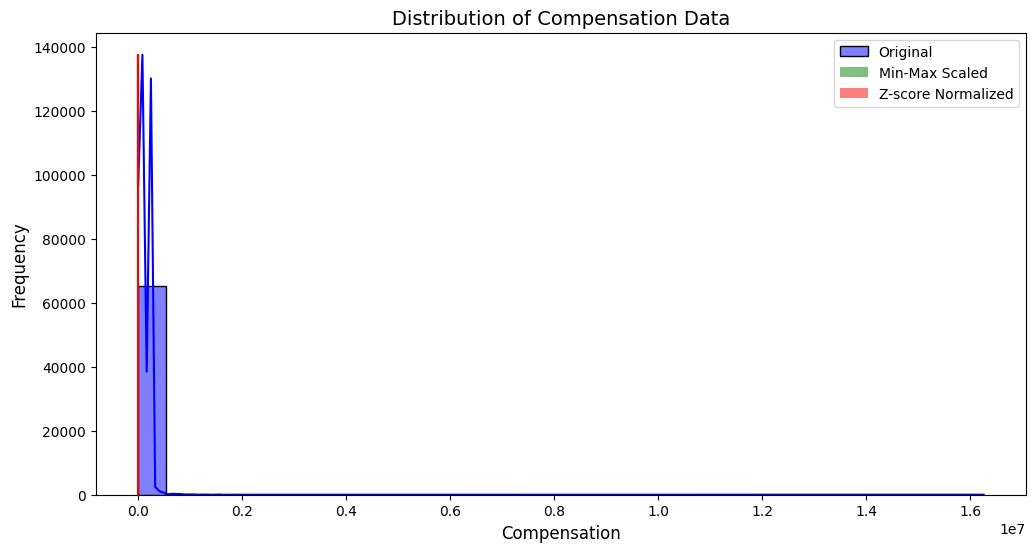

In [18]:
!pip install seaborn
import seaborn as sns

# 1. ヒストグラムの描画
plt.figure(figsize=(12, 6))

# 元のデータの分布
sns.histplot(df['ConvertedCompYearly'], bins=30, kde=True, color='blue', label='Original')

# Min-Max 正規化後のデータの分布
sns.histplot(df['ConvertedCompYearly_Norm'], bins=30, kde=True, color='green', label='Min-Max Scaled')

# Z-score 正規化後のデータの分布
sns.histplot(df['ConvertedCompYearly_Zscore'], bins=30, kde=True, color='red', label='Z-score Normalized')

# グラフの設定
plt.title("Distribution of Compensation Data", fontsize=14)
plt.xlabel("Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
